## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [10]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [11]:
train, test = keras.datasets.cifar10.load_data()

In [12]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [13]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [14]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model

In [15]:
"""Code Here
設定超參數
"""
LEARNNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256]
MOMENTUM = 0.95

In [21]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for batch_size in BATCH_SIZE:
    keras.backend.clear_session()
    print("Experiment with Batch_size = %.3f"%(batch_size))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
    optimizer = keras.optimizers.SGD(lr=LEARNNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
    model.fit(x_train, y_train,
                 epochs=EPOCHS,
                 batch_size=batch_size,
                 validation_data=(x_test, y_test),
                 shuffle=True)
    
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-batch_size-%s"%(batch_size)
    results[exp_name_tag] = {"train-loss" : train_loss,
                                         "valid-loss" : valid_loss,
                                         "train-acc" : train_acc,
                                         "valid-acc" : valid_acc}

Experiment with Batch_size = 2.000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128) 

50000/50000 [==============================] - 177s 4ms/step - loss: 2.2639 - acc: 0.1435 - val_loss: 3.1385 - val_acc: 0.1631
Epoch 42/50
50000/50000 [==============================] - 177s 4ms/step - loss: 2.2604 - acc: 0.1466 - val_loss: 3.0333 - val_acc: 0.1835
Epoch 43/50
50000/50000 [==============================] - 176s 4ms/step - loss: 2.2602 - acc: 0.1504 - val_loss: 3.1464 - val_acc: 0.2188
Epoch 44/50
50000/50000 [==============================] - 2007s 40ms/step - loss: 2.2536 - acc: 0.1541 - val_loss: 3.2726 - val_acc: 0.1889
Epoch 45/50
50000/50000 [==============================] - 2487s 50ms/step - loss: 2.2575 - acc: 0.1525 - val_loss: 3.6072 - val_acc: 0.1859
Epoch 46/50
50000/50000 [==============================] - 4534s 91ms/step - loss: 2.2505 - acc: 0.1576 - val_loss: 3.9058 - val_acc: 0.1674
Epoch 47/50
50000/50000 [==============================] - 2963s 59ms/step - loss: 2.2574 - acc: 0.1526 - val_loss: 3.6857 - val_acc: 0.1823
Epoch 48/50
50000/50000 [======

50000/50000 [==============================] - 26s 517us/step - loss: 1.1417 - acc: 0.5957 - val_loss: 1.3936 - val_acc: 0.5220
Epoch 40/50
50000/50000 [==============================] - 26s 513us/step - loss: 1.1375 - acc: 0.5973 - val_loss: 1.4596 - val_acc: 0.4910
Epoch 41/50
50000/50000 [==============================] - 25s 502us/step - loss: 1.1299 - acc: 0.5986 - val_loss: 1.3345 - val_acc: 0.5385
Epoch 42/50
50000/50000 [==============================] - 25s 501us/step - loss: 1.1269 - acc: 0.6027 - val_loss: 1.3578 - val_acc: 0.5278
Epoch 43/50
50000/50000 [==============================] - 25s 506us/step - loss: 1.1257 - acc: 0.6013 - val_loss: 1.3495 - val_acc: 0.5241
Epoch 44/50
50000/50000 [==============================] - 25s 505us/step - loss: 1.1256 - acc: 0.5975 - val_loss: 1.3453 - val_acc: 0.5333
Epoch 45/50
50000/50000 [==============================] - 26s 515us/step - loss: 1.1204 - acc: 0.6042 - val_loss: 1.3605 - val_acc: 0.5261
Epoch 46/50
50000/50000 [=======

50000/50000 [==============================] - 19s 378us/step - loss: 0.8841 - acc: 0.6827 - val_loss: 1.5017 - val_acc: 0.5177
Epoch 38/50
50000/50000 [==============================] - 19s 378us/step - loss: 0.8765 - acc: 0.6860 - val_loss: 1.4820 - val_acc: 0.5148
Epoch 39/50
50000/50000 [==============================] - 19s 378us/step - loss: 0.8685 - acc: 0.6885 - val_loss: 1.5039 - val_acc: 0.5091
Epoch 40/50
50000/50000 [==============================] - 19s 382us/step - loss: 0.8582 - acc: 0.6919 - val_loss: 1.5063 - val_acc: 0.5171
Epoch 41/50
50000/50000 [==============================] - 19s 389us/step - loss: 0.8482 - acc: 0.6959 - val_loss: 1.5151 - val_acc: 0.5095
Epoch 42/50
50000/50000 [==============================] - 20s 391us/step - loss: 0.8374 - acc: 0.6984 - val_loss: 1.5750 - val_acc: 0.5060
Epoch 43/50
50000/50000 [==============================] - 20s 403us/step - loss: 0.8363 - acc: 0.6984 - val_loss: 1.5055 - val_acc: 0.5188
Epoch 44/50
50000/50000 [=======

50000/50000 [==============================] - 9s 175us/step - loss: 0.4551 - acc: 0.8412 - val_loss: 2.1295 - val_acc: 0.4583
Epoch 36/50
50000/50000 [==============================] - 9s 174us/step - loss: 0.4370 - acc: 0.8486 - val_loss: 2.2178 - val_acc: 0.4668
Epoch 37/50
50000/50000 [==============================] - 9s 174us/step - loss: 0.4358 - acc: 0.8482 - val_loss: 2.1472 - val_acc: 0.4652
Epoch 38/50
50000/50000 [==============================] - 9s 175us/step - loss: 0.4097 - acc: 0.8580 - val_loss: 2.0146 - val_acc: 0.4812
Epoch 39/50
50000/50000 [==============================] - 9s 177us/step - loss: 0.3889 - acc: 0.8666 - val_loss: 2.2009 - val_acc: 0.4698
Epoch 40/50
50000/50000 [==============================] - 9s 177us/step - loss: 0.3695 - acc: 0.8737 - val_loss: 2.4723 - val_acc: 0.4391
Epoch 41/50
50000/50000 [==============================] - 9s 180us/step - loss: 0.3755 - acc: 0.8710 - val_loss: 2.3764 - val_acc: 0.4573
Epoch 42/50
50000/50000 [==============

50000/50000 [==============================] - 6s 113us/step - loss: 0.4067 - acc: 0.8716 - val_loss: 1.9597 - val_acc: 0.4724
Epoch 34/50
50000/50000 [==============================] - 6s 113us/step - loss: 0.3901 - acc: 0.8763 - val_loss: 2.0192 - val_acc: 0.4732
Epoch 35/50
50000/50000 [==============================] - 6s 112us/step - loss: 0.3722 - acc: 0.8819 - val_loss: 2.0028 - val_acc: 0.4700
Epoch 36/50
50000/50000 [==============================] - 6s 113us/step - loss: 0.3560 - acc: 0.8877 - val_loss: 1.9901 - val_acc: 0.4758
Epoch 37/50
50000/50000 [==============================] - 6s 113us/step - loss: 0.3310 - acc: 0.8970 - val_loss: 2.0957 - val_acc: 0.4648
Epoch 38/50
50000/50000 [==============================] - 6s 113us/step - loss: 0.3183 - acc: 0.9020 - val_loss: 2.0569 - val_acc: 0.4804
Epoch 39/50
50000/50000 [==============================] - 6s 114us/step - loss: 0.2962 - acc: 0.9113 - val_loss: 2.1879 - val_acc: 0.4711
Epoch 40/50
50000/50000 [==============

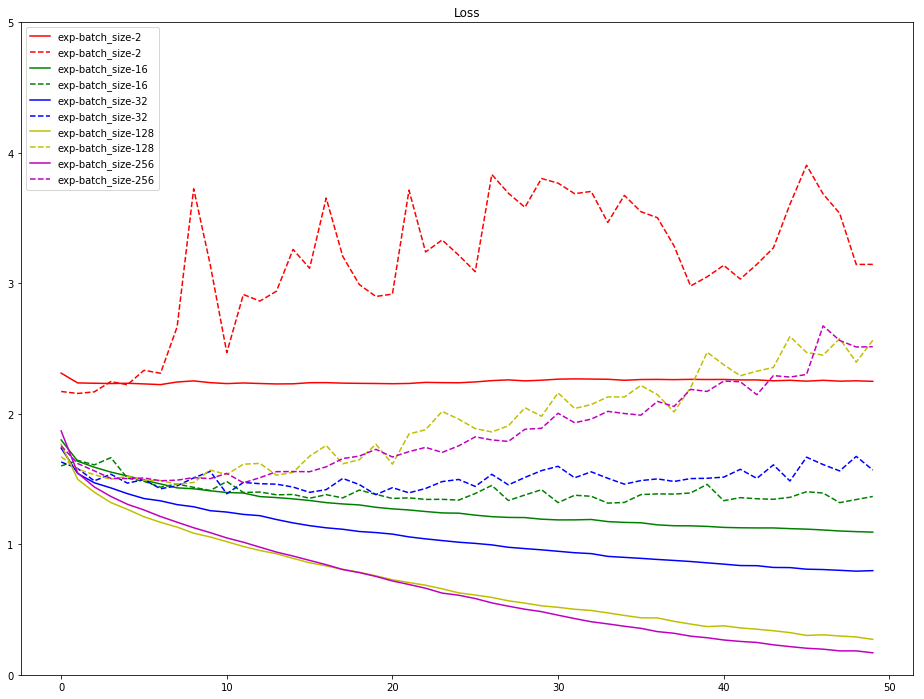

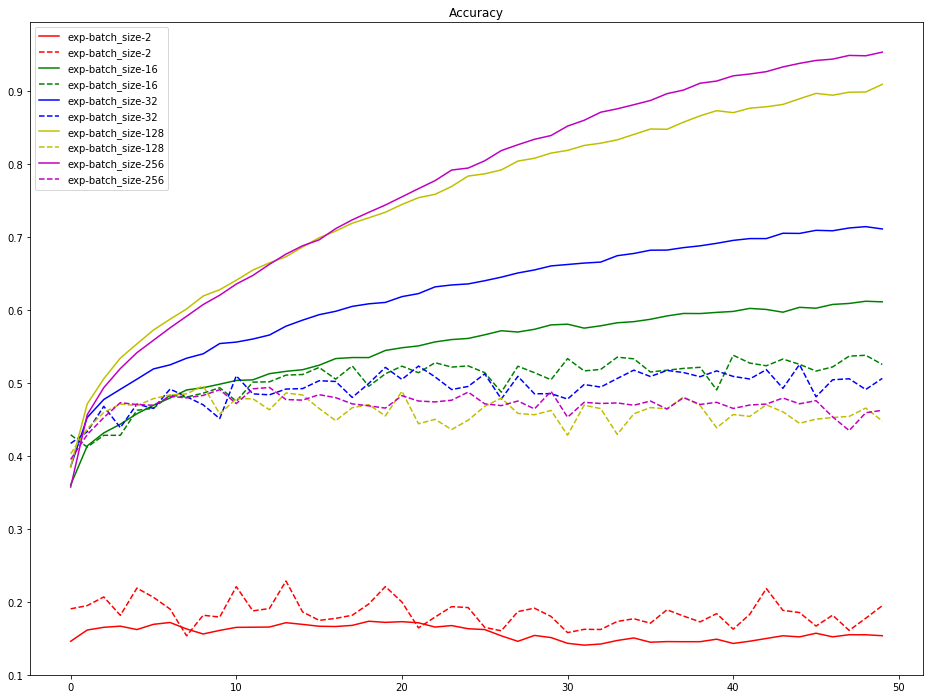

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(16, 12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]["train-loss"])), results[cond]["train-loss"], "-", label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]["valid-loss"])), results[cond]["valid-loss"], "--", label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()


plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]["train-acc"])), results[cond]["train-acc"], "-", label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]["valid-acc"])), results[cond]["valid-acc"], "--", label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()